In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier as KNC
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# import dataset
DR_df = pd.read_csv("../Resources/DR_complete_clean.csv")
DR_df.head()

,class_,u_,g_,r_,i_,z_,redshift_
0,2,19.19619,17.83329,17.52225,17.40237,17.35182,-0.000220
1,2,21.65541,19.13715,17.92577,17.44741,17.15818,-0.000008
2,2,20.70867,19.20954,18.55966,18.24395,18.10117,0.000096
3,2,22.88806,21.20900,19.90560,19.33555,19.08966,-0.000247
4,2,17.82932,16.11081,15.39808,15.13612,15.00507,-0.000131


In [2]:
print(DR_df.keys())

Index(['class_', 'u_', 'g_', 'r_', 'i_', 'z_', 'redshift_'], dtype='object')


In [3]:
DR_df.shape

(108066, 7)

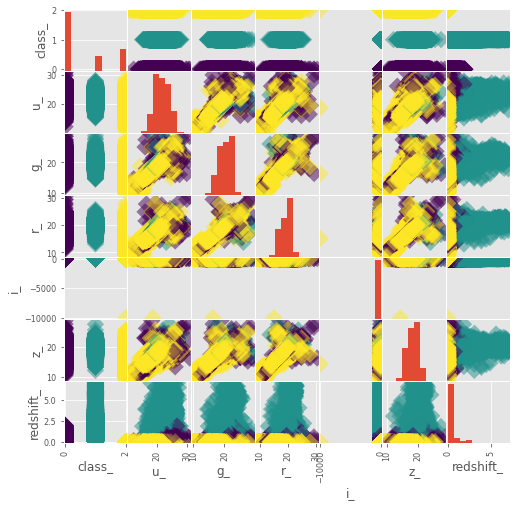

In [4]:
# Scatter Matrix
_ = pd.plotting.scatter_matrix(DR_df, c=DR_df['class_'], figsize=[8,8], s=150, marker='D')

In [5]:
X = DR_df.drop('class_', axis=1) # independent features
y = DR_df['class_'] # Target

Real world data often contains considerably different numbers of samples for the classes to learn (class imbalance). Training a classifier on an unbalanced data set could introduce a classification bias. A common method to avoid this bias, is to stratify the data by over- or under-sampling samples based on their class labels.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

In laymans, model complexity can be summarized as follows:  

- Larger k = smoother decision boundar = less complex model
- Smaller k = can lead to overfitting = more complex model

So we will develop a curve for the training and testing data.
We will compute and plot the training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, we will develop an intuition for overfitting and underfitting.

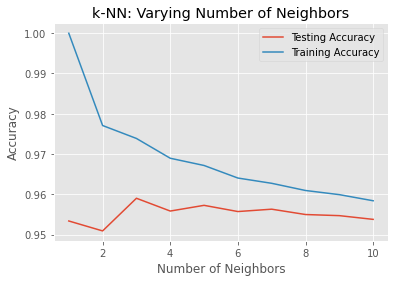

In [7]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 11)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNC(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [8]:
knn = KNC(n_neighbors = 5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print("Test set predictions:\n{}".format(y_pred))

Test set predictions:
[1 0 2 ... 1 2 0]


In [9]:
# Accuracy score
score = knn.score(X_test, y_test)
print("Test set accuracy:\n{}".format(score))

Test set accuracy:
0.957248611967921
